<a href="https://colab.research.google.com/github/MitchellPritchett/pdse_ai_workshop/blob/main/%5BPDSE%5DAI_workshop_week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/WegraLee/deep-learning-from-scratch.git

fatal: destination path 'deep-learning-from-scratch' already exists and is not an empty directory.


In [ ]:
cd deep-learning-from-scratch/ch03

/content/deep-learning-from-scratch/ch03


# 3.6 추론 구현

In [ ]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(X_train, y_train), (X_test, y_test) = load_mnist(flatten=True, normalize=False)

Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!


In [ ]:
X_train.shape

(60000, 784)

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_test.shape

(10000, 784)

In [ ]:
y_test.shape

(10000,)

5
(784,)
(28, 28)


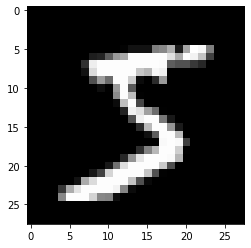

In [ ]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
import numpy as np
from dataset.mnist import load_mnist
import matplotlib.pyplot as plt
from matplotlib.image import imread
%matplotlib inline

img = X_train[0]
label = y_train[0]
print(label)

print(img.shape)  # (784,)
img = img.reshape(28, 28)  # 형상을 원래 이미지의 크기로 변형
print(img.shape)  # (28, 28)

plt.imshow(img, cmap='gray')
plt.show()

In [ ]:
[0,0,0,0,1,0,0,0,0,0] --> 5

In [11]:
# 신경망 추론 구현하기
# 매개변수는 이미 주어진 데이터를 사용한다.(sample_weight.pkl 에 저장되어 있음)
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist
import numpy as np
import pickle

# 이 함수는 추론할 데이터를 로딩합니다.
def get_data():
    ###############################################################################################################
    # TO DO: 추론할 데이터 로딩하기
    # input: 
    # output: X_test, y_test
    # condition: 1. 데이터를 normalize 해주세요. 2. 데이터를 1차원으로 바꿔주세요. 3. 원핫인코딩은 하지 않습니다.
    # hint: 1. load_mnist() 함수는 (train, train_label), (test, test_label) 꼴로 리턴합니다.
    #       2. load_mnist() 함수의 파라미터로는 normalize, flatten, one_hot_label 이 있고 모두 bool 값을 가집니다.
    ######################################### modification starts here ############################################
    (X_train, y_train), (X_test, y_test) = load_mnist(flatten=True, normalize=True, one_hot_label=False)
    ######################################### modification ends here ##############################################
    return X_test, y_test

In [33]:
# 이 함수는 이미 학습된 매개변수를 가지고 와서 신경망을 initializing 합니다.
# DO NOT MODIFY
def init_network():
    with open("sample_weight.pkl" , 'rb') as f:
        network = pickle.load(f)
    # print("This is sample weights:", network) # 출력해서 신경망(매개변수) 확인하기
    return network


In [ ]:
tmp_network = init_network()

In [15]:
tmp_network['W1'].shape

(784, 50)

In [16]:
tmp_network['W2'].shape

(50, 100)

In [19]:
tmp_network['W3'].shape

(100, 10)

In [17]:
tmp_network['b1'].shape

(50,)

In [18]:
tmp_network['b2'].shape

(100,)

In [20]:
tmp_network['b3'].shape

(10,)

In [22]:
# sigmoid fuction
# DO NOT MODIFY
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# softmax function
# DO NOT MODIFY
def softmax(x):
    c = np.max(x)
    x = x - c 
    return np.exp(x) / np.sum(np.exp(x))

In [23]:
a1 = X_train[0].dot(tmp_network['W1']) + tmp_network['b1']
z1 = sigmoid(a1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


In [26]:
X_train[0].dot(tmp_network['W1']).shape

(50,)

In [25]:
a1.shape

(50,)

In [24]:
z1.shape

(50,)

In [34]:

# 이 함수로 추론을 합니다.
def predict(network, x):
    ###############################################################################################################
    # TO DO: feed forward 신경망 연산하기
    # input: network (dict) --> {'W1': ..., 'W2': ..., 'W3': ..., 'b1': ..., 'b2': ..., 'b3': ... }
    #        x (numpy array): 테스트할 데이터가 들어갈 자리
    # output: y (numpy array): predicted y labels
    # condition: 1. 3층 신경망
    #            2. sigmoid as activation function
    #            3. 출력층은 softmax
    ######################################### modification starts here ############################################
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    ###
    a1 = x.dot(W1) + b1
    z1 = sigmoid(a1) # z1.shape 은 (50,)
    a2 = z1.dot(W2) + b2
    z2 = sigmoid(a2) # z2.shape (100,)
    a3 = z2.dot(W3) + b3
    y = softmax(a3) # y.shape (10,)
    ######################################### modification ends here ##############################################
    # print("This is the prediction for the 0th image:", y[0])
    return y

In [28]:
tmp_y = [0.1, 0.2, 0.7, 0, 0, 0, 0, 0, 0, 0]
np.max(tmp_y)

0.7

In [29]:
np.argmax(tmp_y)

2

In [36]:
# 자 이제 사용할 함수를 모두 만들었습니다.
# 추론을 해보겠습니다.

# get_data()로 테스트 데이터를 불러옵니다.
X_test, y_test = get_data()

# 네트워크를 이니셜라이징합니다 (== 매개변수를 가지고 있는 딕셔너리를 불러옵니다)
network = init_network()

# 추론해보고 성능을 확인합니다.
num_test = X_test.shape[0]
num_correct = 0

for i in range(num_test):
    y = predict(network, X_test[i])
    # y --> [0.1, 0.2, 0.7, 0, 0, 0, 0, 0, 0, 0]
    ###############################################################################################################
    # TO DO: accuracy 확인하기
    # hint: 1. y는 i번째 이미지에 대한 예측값입니다. 
    #          각 인덱스는 손글씨 숫자를 의미하고 해당 원소는 해당 인덱스에 속할 확률을 의미합니다.
    #          우리는 가장 높은 확률을 부여받은 숫자가 무엇인지 알고 싶습니다.
    #          numpy.argmax() 메서드를 찾아보세요.
    ######################################### modification starts here ############################################
    y_pred = np.argmax(y)
    # 예측한 것과 ground truth lable이 같다면, num_correct에 1 추가
    if y_pred == y_test[i]:
        num_correct += 1

# accuracy 계산하기. 정확도 == 맞은 수 / 전체 데이터 수
accuracy = num_correct / num_test
    ######################################### modification ends here ##############################################

# Your answer should be about 93.52%
print("Accuracy:", accuracy)

Accuracy: 0.9352


In [42]:
# 지금까지 이미지를 하나씩 넣어서 추론을 해봤습니다.
# 이제는 배치 처리를 구현해보겠습니다.

# 배치 사이즈는 100으로 하겠습니다.
# 이미지 100장을 한꺼번에 넘겨주겠다는 것입니다.
batch_size = 100
num_correct = 0

###############################################################################################################
# TO DO: 배치 단위로 추론하고 accuracy 계산하기
# hint: 1. for loop을 이용해서 한번개 100개씩 끊어서 돌려보세요.
#       2. y_pred[i] 는 i번째 이미지에 대한 예측값입니다. 
#          각 인덱스는 손글씨 숫자를 의미하고 해당 원소는 해당 인덱스에 속할 확률을 의미합니다.
#          우리는 가장 높은 확률을 부여받은 숫자가 무엇인지 알고 싶습니다.
#          numpy.argmax() 메서드를 찾아보세요. 100개의 결과가 한꺼번에 나오니 axis에 주의하세요!
######################################### modification starts here ############################################
for i in range(0, num_test, batch_size): # i --> 0, 100, 200, 300, ..., 9000
    X_batch = X_test[i:i+batch_size] 
    y_batch_pred = predict(network, X_batch) # y_batch_pred.shape (100,10)
    num_correct += np.sum(np.argmax(y_batch_pred, axis=1) == y_test[i:i+batch_size])
    if i == 0:
        print(f"This is shape of the 0th y_batch_pred: {y_batch_pred.shape}")
        print(f"This is the predicted labels of the 0th 100 images: \n{np.argmax(y_batch_pred, axis=1)}")
        print(f"This is the comparison with the ground truth label: \n{np.argmax(y_batch_pred, axis=1) == y_test[i:i+batch_size]}")
        print(f"This is the number of correct labels: {np.sum(np.argmax(y_batch_pred, axis=1) == y_test[i:i+batch_size])}")

accuracy = num_correct / num_test
######################################### modification ends here ##############################################

# Your answer should be about 93.52%
print("Accuracy:", accuracy)

This is shape of the 0th y_batch_pred: (100, 10)
This is the predicted labels of the 0th 100 images: 
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4 9 6 6 5 4 0 7 4 0 1 3 1 3 6 7 2 7
 1 2 1 1 7 4 2 3 5 1 2 4 4 6 3 5 5 6 0 4 1 9 5 7 8 9 3 7 4 2 4 3 0 7 0 2 9
 1 7 3 2 9 7 7 6 2 7 8 4 7 3 6 1 3 6 4 3 1 4 1 7 6 9]
This is the comparison with the ground truth label: 
[ True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True]
This is the number of correct l

# 4장. 신경망 학습

In [ ]:
# 손실 함수 

# 오차제곱합 함수 구현하기
###############################################################################################################
# TO DO: 오차제곱합 함수 구현하기
# input: y_pred (numpy array), y_test (numpy array): one hot encoded
# hint: numpy.sum을 사용해보세요.
######################################### modification starts here ############################################
def sum_squared_error(y_pred, y_test):
    return 
######################################### modification ends here ##############################################

# cross entropy loss
###############################################################################################################
# TO DO: CEE 함수 구현하기
# input: y_pred (numpy array), y_test (numpy array)
# hint: numpy.log (자연로그입니다)을 사용해보세요.
#       delta는 log에 0이 안들어가게 해주는 요소입니다.
######################################### modification starts here ############################################
def sum_squared_error(y_pred, y_test):
    delta = 1e-7 # DO NOT MODIFY
    return 
######################################### modification ends here ##############################################

In [ ]:
# 미니배치 만들기
###############################################################################################################
# TO DO: 미니배치 만들어보기
# hint: 1. numpy.random.choice(100, 10) 은 0부터 99까지의 정수에서 랜덤하게 10개를 뽑아 어레이를 리턴합니다.
#       2. >>> A = np.array([1,2],[3,4],[4,5])
#          >>> B = np.array([0,2])
#          >>> A[B]
#          array([[1, 2],
#                 [4, 5]])
######################################### modification starts here ############################################
num_train = X_train.shape[0]
batch_size = 100
batch_mask = 
X_batch =
y_batch = 
######################################### modification ends here ##############################################

In [ ]:
# 이제 배치용 교차 엔트로피 오차를 구현해봅시다.
###############################################################################################################
# TO DO: implement cross entropy loss function for batch data
# input: y_pred, y_test --> one hot encoded
######################################### modification starts here ############################################
def cross_entropy_loss(y_pred, y_test):
    if y_pred.ndim == 1: # 1차원이면
        y_test = y_test.reshape(1, -1)
        y_pred = y_pred.reshape(1, -1)
    delta = 1e-7
    batch_size = y_pred.shape[0]
    return 
######################################### modification ends here ##############################################

###############################################################################################################
# TO DO: implement cross entropy loss function for batch data
# input: y_pred, y_test --> number label
# hint: use numpy.arange()
######################################### modification starts here ############################################
def cross_entropy_loss(y_pred, y_test):
    if y_pred.ndim == 1: # 1차원이면
        y_test = y_test.reshape(1, -1)
        y_pred = y_pred.reshape(1, -1)
    delta = 1e-7
    batch_size = y_pred.shape[0]
    return 
######################################### modification ends here ##############################################

In [ ]:
# numerical gradient

###############################################################################################################
# TO DO: 코드는 완성되어 있습니다. 주석을 달아보세요!
######################################### modification starts here ############################################
def numerical_gradient(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val
        it.iternext()  
        
    return grad
######################################### modification ends here ##############################################

In [ ]:
def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)